In [1]:
%load_ext lab_black

In [2]:
%config Completer.use_jedi = False

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import time
from tqdm.notebook import tqdm

from pycaret.regression import *

In [4]:
path = "input"

In [16]:
train = pd.read_csv(path + "/train.csv", index_col=["id"])
test = pd.read_csv(path + "/test.csv", index_col=["id"])
submission = pd.read_csv(path + "/sample_submission.csv", index_col=["id"])

In [17]:
features = [
    "cont1",
    "cont2",
    "cont3",
    "cont4",
    "cont5",
    "cont6",
    "cont7",
    "cont8",
    "cont9",
    "cont10",
    "cont11",
    "cont12",
    "cont13",
    "cont14",
]

In [30]:
exp_reg = setup(
    data=train,
    target="target",
    polynomial_features=True,
    polynomial_degree=3,
    trigonometry_features=True,
    feature_interaction=True,
    transformation=True,
    remove_multicollinearity=True,
    session_id=1003,
)

,Description,Value
0,session_id,1003
1,Target,target
2,Original Data,"(300000, 15)"
3,Missing Values,False
4,Numeric Features,14
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(209999, 19)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
                ('fix_multi',
                 Fix_multicollinearity(correlation_with_target_preference=None,
                                       correlation_with_target_threshold=0.0,
                        

## LightGBM

In [32]:
lgb = create_model("lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5906,0.4962,0.7044,0.0827,0.0801,0.0762
1,0.5945,0.5031,0.7093,0.0796,0.0818,0.0766
2,0.5883,0.4904,0.7003,0.0801,0.0796,0.0759
3,0.5912,0.4946,0.7032,0.0736,0.0799,0.0763
4,0.5911,0.4936,0.7026,0.0825,0.0797,0.0760
5,0.5936,0.4993,0.7066,0.0740,0.0802,0.0765
6,0.5877,0.4872,0.6980,0.0817,0.0794,0.0759
7,0.5886,0.4920,0.7014,0.0774,0.0796,0.0758
8,0.5877,0.4904,0.7003,0.0803,0.0796,0.0758
9,0.5897,0.4944,0.7031,0.0821,0.0798,0.0759


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=1003, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


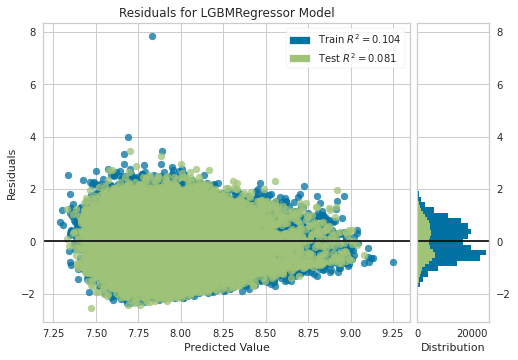

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [33]:
plot_model(lgb)

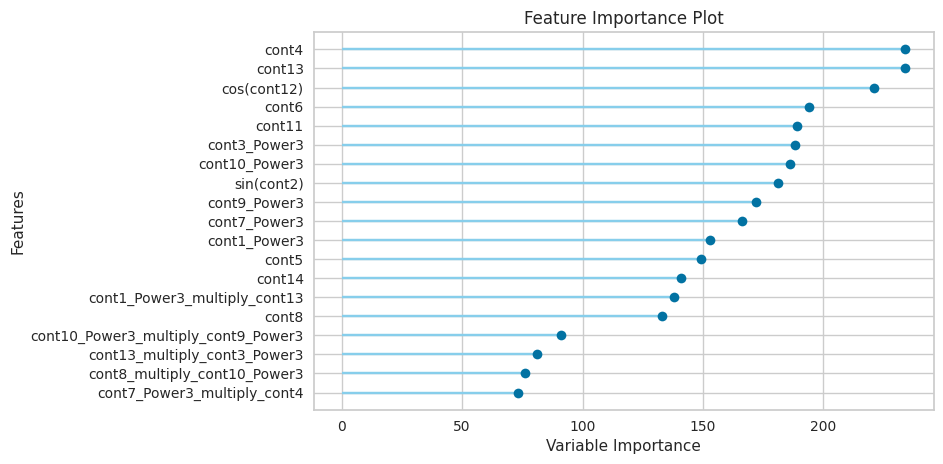

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [34]:
plot_model(lgb, "feature_all")

In [25]:
tuned_lgb = tune_model(lgb, optimize="RMSE")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5890,0.4952,0.7037,0.0844,0.0800,0.0759
1,0.5918,0.5011,0.7079,0.0832,0.0816,0.0763
2,0.5860,0.4881,0.6986,0.0844,0.0794,0.0756
3,0.5889,0.4929,0.7020,0.0768,0.0798,0.0760
4,0.5903,0.4939,0.7027,0.0820,0.0797,0.0759
5,0.5911,0.4966,0.7047,0.0791,0.0800,0.0761
6,0.5850,0.4848,0.6963,0.0861,0.0792,0.0755
7,0.5869,0.4902,0.7001,0.0808,0.0795,0.0755
8,0.5856,0.4888,0.6992,0.0833,0.0794,0.0755
9,0.5874,0.4923,0.7017,0.0859,0.0796,0.0756


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:LGBMRegressor(bagging_fraction=1.0, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.077, max_depth=-1,
              min_child_samples=95, min_child_weight=0.001, min_split_gain=0.8,
              n_estimators=190, n_jobs=-1, num_leaves=70, objective=None,
              random_state=1003, reg_alpha=2, reg_lambda=0.0005, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


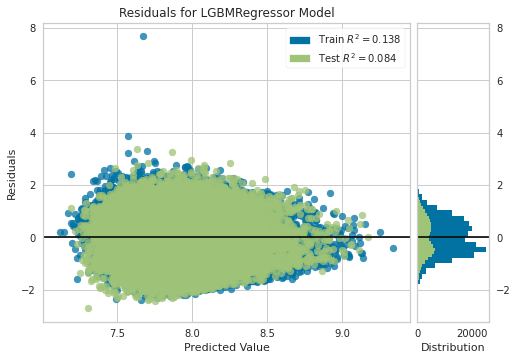

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [26]:
plot_model(tuned_lgb)

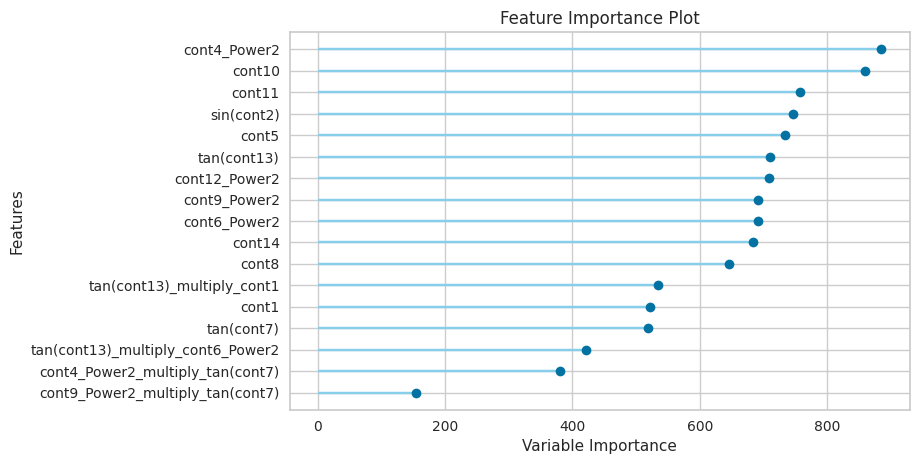

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [27]:
plot_model(tuned_lgb, "feature_all")

In [49]:
submission["target"] = predict_model(tuned_lgb, test)["Label"]

submission.to_csv("output/submission.csv")